In [2]:
import pandas as pd
import gzip
import json

In [4]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('data/Musical_Instruments_5.json.gz')

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 30, 2016",A3FO5AKVTFRCRJ,0739079891,francisco,It's good for beginners,Five Stars,1477785600,NaN,NaN,NaN
1,5.0,True,"06 30, 2016",A3UCGC1DHFMBCE,0739079891,Eb Jack Murray,I recommend this starter Ukulele kit. I has e...,Five Stars,1467244800,NaN,NaN,NaN
2,5.0,True,"05 9, 2016",A2S9SLRYLPGYZB,0739079891,Clara LaMarr,G'daughter received this for Christmas present...,Learning new songs to play regularly,1462752000,NaN,NaN,NaN
3,4.0,True,"04 10, 2016",A15RTJWPG8OKOE,0739079891,Eagle80,"According to my order history, I bought this t...",A bargain-bin good-enough ukulele that's held ...,1460246400,NaN,NaN,NaN
4,1.0,True,"02 6, 2016",A12ET1WO3OAVU7,0739079891,Amazon Customer,Please pay attention better than I did to the ...,Poor Quality product.,1454716800,NaN,NaN,NaN


In [6]:
df['overall'].value_counts()

5.0    161837
4.0     38783
3.0     16030
1.0      7465
2.0      7277
Name: overall, dtype: int64

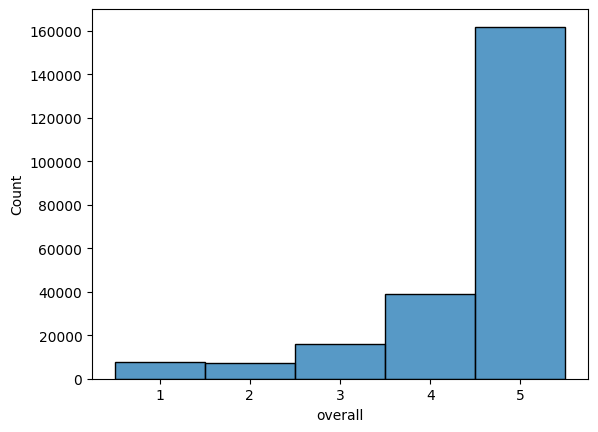

In [7]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# Product Scores
sns.histplot(df, x="overall", discrete=True)
plt.show()

## Data Cleaning

In [8]:
from pyspark.sql import SparkSession

In [1]:
spark = SparkSession.builder.getOrCreate()

NameError: name 'SparkSession' is not defined